# Non linear curve fitting with python

##### Germain Salvato Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

This cookbook presents how to fit a non linear model on a set of data using python.

## Python set up

In [1]:
# manage data and fit
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid")

## Read and plot data

Read the data from a csv file with pandas.

In [2]:
df = pd.read_csv("donnees_exo9.csv", sep=";")
df.head(8) # first 8 lines

,x,y,Dy
0,0,1.371300,-0.021016
1,1,0.747050,-0.089438
2,2,0.587580,0.017098
3,3,0.510110,0.089353
4,4,0.424561,0.083885
5,5,0.394960,0.121319
6,6,0.157880,-0.152851
7,7,0.223860,-0.016393


Plot the data with error bars.

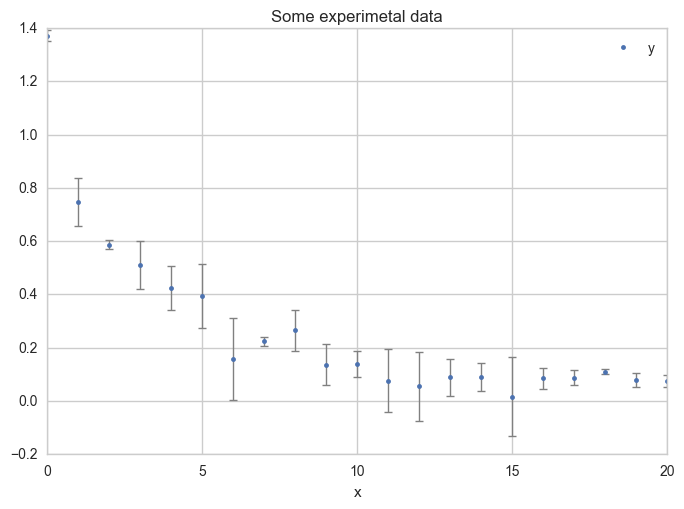

In [3]:
ax = df.plot(
    x="x", y="y",
    kind="line", yerr="Dy", title="Some experimetal data", 
    linestyle="", marker=".",
    capthick=1, ecolor="gray", linewidth=1
)

## Fit a model on the data

We want to fit the following model, with parameters, $a$ and $b$, on the above data.

$$f(x) = \ln \dfrac{(a + x)^2}{(x-c)^2}$$

### First step : the function

First, we define a function corresponding to the model :

In [4]:
def model(x, a, c):
    return pd.np.log((a + x)**2 / (x - c)**2)

### Second step : initialisation of parameters

Compute y values for the model with an estimate.

In [5]:
df["model"] = model(df["x"], 3, -2)
df.head(8)

,x,y,Dy,model
0,0,1.371300,-0.021016,0.810930
1,1,0.747050,-0.089438,0.575364
2,2,0.587580,0.017098,0.446287
3,3,0.510110,0.089353,0.364643
4,4,0.424561,0.083885,0.308301
5,5,0.394960,0.121319,0.267063
6,6,0.157880,-0.152851,0.235566
7,7,0.223860,-0.016393,0.210721


Now plot your first estimation of the model.

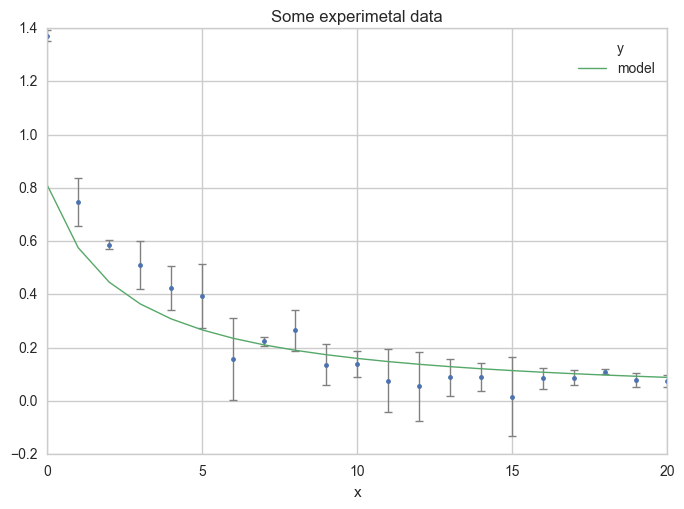

In [6]:
ax = df.plot(
    x="x", y="y",
    kind="line", yerr="Dy", title="Some experimetal data", 
    linestyle="", marker=".",
    capthick=1, ecolor="gray", linewidth=1
)
ax = df.plot(
    x="x", y="model",
    kind="line", ax=ax, linewidth=1
)

### Third step : Do the fit

Now we explicitely do the fit with `curve_fit` using our `model()` function and the initial guess for the parameters. Run `help(curve_fit)` and read the documentation about the function. `curve_fit` follow a least-square approach and will minimize :

$$\sum_k \dfrac{\left(f(\text{xdata}_k, \texttt{*popt}) - \text{ydata}_k\right)^2}{\sigma_k^2}$$

In [ ]:
help(curve_fit)

In [7]:
popt, pcov = curve_fit(
    f=model,         # model function
    xdata=df["x"],  # x data
    ydata=df["y"],   # y data
    p0=(3, -2),      # initial value of the parameters
    sigma=df["Dy"]   # uncertainties on y
)

That's it !

### Fourth step : Results of the fit

Parameters are in  `popt` :

In [8]:
a_opt, c_opt = popt
print("a = ", a_opt)
print("c = ", c_opt)

a =  2.01673012047
c =  -1.01484117647


You can compute a standard deviation error from `pcov` :

In [9]:
perr = np.sqrt(np.diag(pcov))
Da, Dc = perr
print("a = %6.2f +/- %4.2f" % (a_opt, Da))
print("c = %6.2f +/- %4.2f" % (c_opt, Dc))

a =   2.02 +/- 0.06
c =  -1.01 +/- 0.03


You can compute the determination coefficient with :

\begin{equation}
    R^2 = \frac{\sum_k (y^{calc}_k - \overline{y})^2}{\sum_k (y_k - \overline{y})^2}
\end{equation}

In [10]:
R2 = np.sum((model(df["x"], a_opt, c_opt) - df["y"].mean())**2) / np.sum((df["y"] - df["y"].mean())**2)
print("r^2 = %10.6f" % R2)

r^2 =   0.910600


Now, see the results on a plot :

In [11]:
df["model"] = model(df["x"], a_opt, c_opt)
df.head()

,x,y,Dy,model
0,0,1.371300,-0.021016,1.373491
1,1,0.747050,-0.089438,0.807266
2,2,0.587580,0.017098,0.573842
3,3,0.510110,0.089353,0.445561
4,4,0.424561,0.083885,0.364284


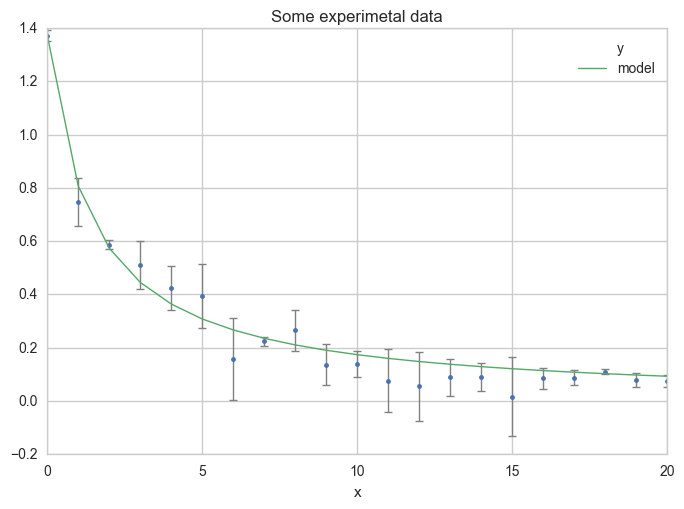

In [12]:
ax = df.plot(
    x="x", y="y",
    kind="line", yerr="Dy", title="Some experimetal data", 
    linestyle="", marker=".",
    capthick=1, ecolor="gray", linewidth=1
)
ax = df.plot(
    x="x", y="model",
    kind="line", ax=ax, linewidth=1
)

Or using more x values for the model, in order to get a smoother curve :

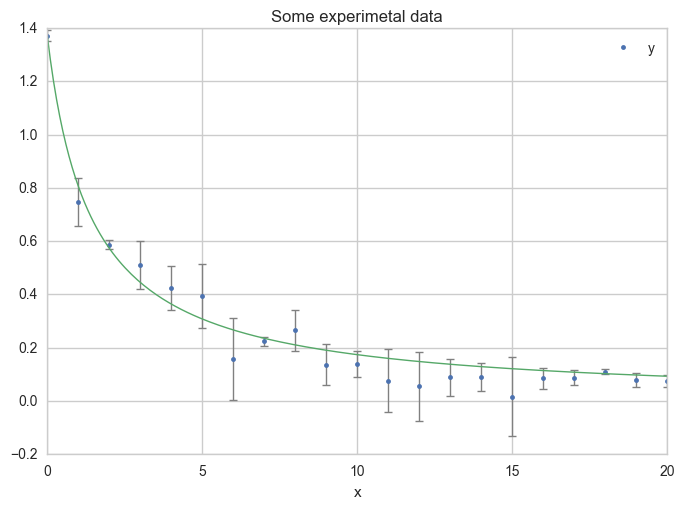

In [13]:
x = np.linspace(0, 20, 200)
ax = df.plot(
    x="x", y="y",
    kind="line", yerr="Dy", title="Some experimetal data", 
    linestyle="", marker=".",
    capthick=1, ecolor="gray", linewidth=1
)
ax.plot(x, model(x, a_opt, c_opt), linewidth=1)